# Setup

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

CUTOFF_FREQ = 600

COLOR = {
    'susie': np.array((137, 23, 107))/255,
    'noelle': np.array((255, 206, 49))/255,
    # 'berdly': np.array((70, 179, 251))/255,
    'berdly': np.array((2, 206, 253))/255,  # plug color
    'ralsei': np.array((79, 201, 137))/255,
    'queen': np.array((1, 161, 232))/255,
}

data_path = Path('data')
data = {}

for path in data_path.glob('*.npz'):
    name = path.name.removesuffix('.npz')
    npz = np.load(path)
    scale, level = npz['scale'], npz['level']
    cutoff_idx = np.searchsorted(scale, CUTOFF_FREQ, side='right')
    scale, level = scale[:cutoff_idx], level[:cutoff_idx]
    level /= np.max(level)
    data[name] = {
        'scale': scale,
        'level': level,
    }

# Summary

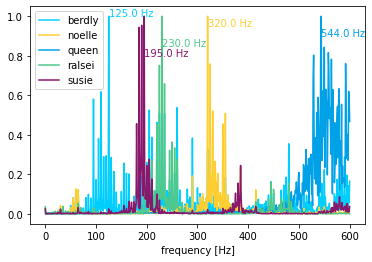

In [2]:
for i, (name, wave) in enumerate(data.items()):
    peak_idx = np.argmax(wave['level'])
    peak_freq = wave['scale'][peak_idx]
    plt.plot(wave['scale'], wave['level'], label=name, color=COLOR[name])
    plt.annotate(f"{peak_freq} Hz", xy=(peak_freq, 1 - i*0.05), color=COLOR[name])

plt.xlabel('frequency [Hz]')
plt.legend(loc='upper left')
plt.show()